# Machine Learning
## Programming Assessment 5: Neural Networks

### Instructions


*   The aim of this assignment is to learn machine learning tools - Keras, Sklearn and PyTorch.
*   You must use the Python programming language.
*   You can add as many code/markdown cells as required.
*   ALL cells must be run (and outputs visible) in order to get credit for your work.
*   Please use procedural programming style and comment your code thoroughly.
*   There are three parts of this assignment. The import statements for the required libraries is already given.


### Introduction
In this assignment, you will be using neural networks to implement a simplified version of a speech recognizer which aims to identify what digit has been spoken in a given audio file.

In order to accomplish this, you will be using different toolkits, popularly used in machine learning for training models. In this assignment, you will be introduced to Sklearn, Keras, and Pytorch. An implementation from scratch is not required for the purposes of this assignment.

Have fun!

In [1]:
import numpy as np
import pandas as pd

## Part 1: Feature Extraction
You will the MNIST audio dataset which can be downloaded from [here](https://www.kaggle.com/datasets/sripaadsrinivasan/audio-mnist). The dataset contains audio recordings, where speakers say digits (0 to 9) out loud. Use the following line of code to read the audio file:
```python
audio, sr = librosa.load(file_path, sr=16000)
```
You need to extract MFCC features for each audio file, the feature extraction code is give (you can read about MFCC from [here](https://link.springer.com/content/pdf/bbm:978-3-319-49220-9/1.pdf)). Length of each feature vector will be 13. You need to save all the feature vectors in a csv file with ith column representing ith feature, and each row representing an audio file. Add a 'y' column to the csv file and append the labels column at the end. Your csv file should look like this:

| x1 | x2 | x3 | x4 | x5 | x6 | x7 | x8 | x9 | x10 | x11 | x12 | x13 | y |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| -11.347038 | -8.070062 | -0.915299 | 6.859546 | 8.754656 | -3.440287 | -5.738487 | -21.853178 | -9.859462 | 3.584948 | -2.661195	| 1.023747 | -4.574332 | 2 |

Print out 2 vectors in this notebook.

Split the dataset into train and test with 80:20 ratio. Print the train data size and test data size.

In [3]:
import os
import IPython.display as ipd
from glob import glob
import python_speech_features as mfcc
import librosa
from sklearn.model_selection import train_test_split

In [4]:
# directory where audio files are located
root_directory = r'C:\Users\k228732\Downloads\archive\data'

features_list = []
labels_list = []
sample_files = []

for folder in os.listdir(root_directory):
    folder_path = os.path.join(root_directory, folder)
    
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        audio, sr = librosa.load(file_path, sr=16000)
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        features_list.append(mfccs_mean)
        labels_list.append(int(folder))
        
        if len(sample_files) < 3:
            sample_files.append(file_path)


In [5]:
# Create a DataFrame to store features and labels
df = pd.DataFrame(features_list, columns=[f'x{i+1}' for i in range(13)])
df['y'] = labels_list

In [6]:
csv_file_path = r'C:\Users\k228732\Downloads\audio_features_labels.csv'

df.to_csv(csv_file_path, index=False)

print(f"DataFrame saved to {csv_file_path}")

DataFrame saved to C:\Users\k228732\Downloads\audio_features_labels.csv


In [8]:
# Print two feature vectors
df.head(2)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,-603.371155,99.424103,3.953729,40.219067,8.918307,9.111169,-10.020694,1.674718,3.702942,-7.341118,1.142284,9.041625,-8.222440,1
1,-620.521851,104.255943,14.529181,47.233559,17.235832,7.439508,-9.707593,5.227136,-3.324027,-4.706077,2.106712,6.610188,-4.601492,1


In [11]:
# Split the dataset 80:20 ratio
X = df.drop(columns=['y'])
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training data size (80%): {X_train.shape[0]}')
print(f'Test data size (20%): {X_test.shape[0]}')

# play 3 audio samples
for i, file_path in enumerate(sample_files):
    print(f"Playing sample {i+1} from file: {file_path}")
    audio, sr = librosa.load(file_path, sr=16000)
    ipd.display(ipd.Audio(audio, rate=sr))

Training data size (80%): 24000
Test data size (20%): 6000
Playing sample 1 from file: C:\Users\k228732\Downloads\archive\data\01\0_01_0.wav


Playing sample 2 from file: C:\Users\k228732\Downloads\archive\data\01\0_01_1.wav


Playing sample 3 from file: C:\Users\k228732\Downloads\archive\data\01\0_01_10.wav


In [14]:
pip install python_speech_features

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5879 sha256=df5f08f328d4658d665b3b7b52186a3d0b6e8c7aa68aabe6f03cd506890d3600
  Stored in directory: c:\users\k228732\appdata\local\pip\cache\wheels\37\01\19\e6c69a32684ab7b2e3ea4985a571d810cf055c72600e7f9f17
Successfully built python_speech_features
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/8c/8a/2d231b35456506b7c98b3ab9bbf07917b205fed8615d2e59e976ab497fff/librosa-0.10.2.post1-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for soundfile>=0.12.1 from https://files.pythonhosted.org/packages/50/ff/26a4ee48d0b66625a4e4028a055b9f25bc9d7c7b2d17d21a45137621a50d/soundfile-0.12.1-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for pooch>=1.1 from https://files.pythonhosted.org/packages/a8/87/77cc11c7a9ea9fd05503def69e3d18605852cd0d4b0d3b8f15bbeb3ef1d1/pooch-1.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for soxr>=0.3.2 from https://files.pythonhosted.o

## Part 2: Neural Network Implementation

### Task 2.1:  Scikit-learn

In this part you will use the [Scikit-learn](https://scikit-learn.org/stable/index.html) to implement the [Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) and apply it to the MNIST audio dataset (provided in part 1). Split the training dataset into train and evaluation data with 90:10 ratio. Run evaluation on X_eval while training on X_train. Tune the hyperparameters to get the best possible classification accuracy. You need to report accuracy, recall, precision and F1 score on the test dataset and print the confusion matrix.

Expected value for accuracy is 87 or above.

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
import pandas as pd

df = pd.read_csv(r'C:\Users\k228732\Downloads\audio_features_labels.csv')
X = df.drop('y', axis=1)
y = df['y']

# Split the dataset
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create a neural network
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, early_stopping=True, n_iter_no_change=10, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_eval)

In [23]:
# Evaluate performance
report = classification_report(y_eval, y_pred, output_dict=True)
accuracy = report['accuracy']
recall = report['weighted avg']['recall']
precision = report['weighted avg']['precision']
f1_score = report['weighted avg']['f1-score']

print(f"Accuracy: {accuracy:.2f} or {round(accuracy*100, 2)}%")
print(f"Recall: {recall:.2f} or {round(recall*100, 2)}%")
print(f"Precision: {precision:.2f} or {round(precision*100, 2)}%")
print(f"F1 Score: {f1_score:.2f} or {round(f1_score*100, 2)}%")

Accuracy: 0.82 or 82.18%
Recall: 0.82 or 82.18%
Precision: 0.83 or 82.96%
F1 Score: 0.82 or 82.12%


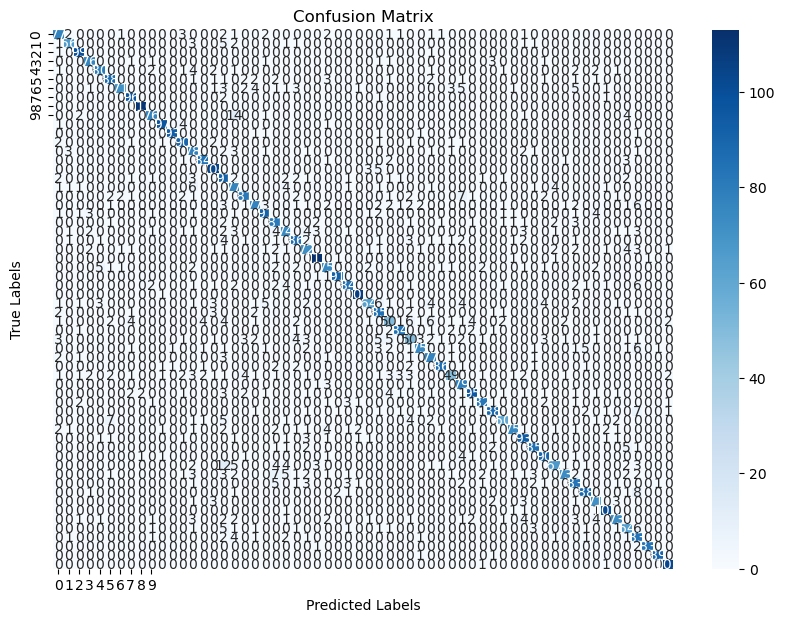

In [24]:
# Confusion matrix
conf_matrix = confusion_matrix(y_eval, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Task 2.2: Tensorflow Keras

In this part you will use the [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to implement the [Neural Network](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/) and apply it to the MNIST audio dataset (provided in part 1). Split the training dataset into train and evaluation data with 90:10 ratio. Run evaluation on X_eval while training on X_train. Tune the hyperparameters to get the best possible classification accuracy. You need to report accuracy, recall, precision and F1 score on the test dataset and print the confusion matrix.

Expected value for accuracy is 87 or above.

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Set the parameters accordingly
LEARNING_RATE = 0.001
BATCH_SIZE = 64
EPOCHS = 50

In [53]:
path = r'C:\Users\k228732\Downloads\audio_features_labels.csv'
df = pd.read_csv(path)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y = y - 1 # ensure to zero index

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.1, random_state=42)

In [56]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_eval, y_eval),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0312 - loss: 12.1639 - val_accuracy: 0.0620 - val_loss: 3.8145
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0824 - loss: 3.7070 - val_accuracy: 0.1300 - val_loss: 3.3702
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1635 - loss: 3.2304 - val_accuracy: 0.2687 - val_loss: 2.6259
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3468 - loss: 2.3163 - val_accuracy: 0.4397 - val_loss: 1.8843
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4426 - loss: 1.9221 - val_accuracy: 0.4730 - val_loss: 1.7875
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5055 - loss: 1.6878 - val_accuracy: 0.5517 - val_loss: 1.5328
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5382 - loss: 1.5710 - val_accuracy: 0.5517 - val_loss: 1.5475
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5588 - loss: 1.4806 - val_accuracy: 0

In [57]:
# Evaluate the model
y_pred_probs = model.predict(X_eval)
y_pred = np.argmax(y_pred_probs, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [59]:
# Print classification report
report = classification_report(y_eval, y_pred, output_dict=True)
accuracy = report['accuracy']
recall = report['weighted avg']['recall']
precision = report['weighted avg']['precision']
f1_score = report['weighted avg']['f1-score']

print(f"Accuracy: {accuracy:.2f} or {round(accuracy*100, 2)}%")
print(f"Recall: {recall:.2f} or {round(recall*100, 2)}%")
print(f"Precision: {precision:.2f} or {round(precision*100, 2)}%")
print(f"F1 Score: {f1_score:.2f} or {round(f1_score*100, 2)}%")


Accuracy: 0.82 or 81.6%
Recall: 0.82 or 81.6%
Precision: 0.82 or 82.49%
F1 Score: 0.81 or 81.44%


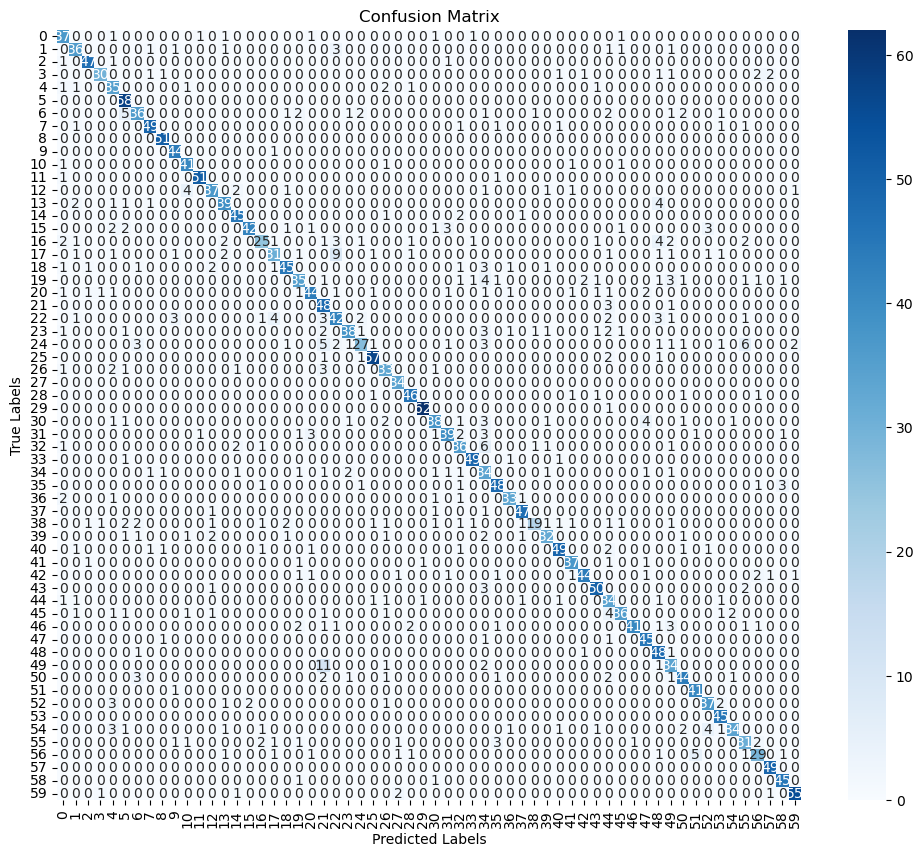

In [60]:
# Confusion matrix
conf_matrix = confusion_matrix(y_eval, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(60), yticklabels=range(60))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Task 2.3: Pytorch

In this part you will use the [Keras](https://pytorch.org/docs/stable/nn.html) to implement the [Neural Network](https://medium.com/analytics-vidhya/a-simple-neural-network-classifier-using-pytorch-from-scratch-7ebb477422d2) and apply it to the MNIST audio dataset (provided in part 1). Split the training dataset into train and evaluation data with 90:10 ratio. Run evaluation on X_eval while training on X_train. You need to use DataLoader to generate batches of data. Tune the hyperparameters to get the best possible classification accuracy. You need to report training loss, training accuracy, validation loss and validation accuracy after each epoch in the following format:
```
Epoch 1/2
loss: 78.67749792151153 - accuracy: 0.6759259259259259 - val_loss: 6.320814955048263 - val_accuracy: 0.7356481481481482
Epoch 2/2
loss: 48.70551285566762 - accuracy: 0.7901234567901234 - val_loss: 6.073690168559551 - val_accuracy: 0.7791666666666667
```
You need to report accuracy, recall, precision and F1 score on the test dataset and print the confusion matrix.

Expected value for accuracy is 87 or above.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [29]:
# Set parameters
LEARNING_RATE = 0.001
BATCH_SIZE = 64
EPOCHS = 50

In [30]:
# Load and preprocess data
path = r'C:\Users\HP\Downloads\audio_features_labels.csv'
df = pd.read_csv(path)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y = y - 1  # Ensure to zero index
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.1, random_state=42)

In [31]:
# Convert data to PyTorch tensors
class AudioDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return len(self.X)

In [32]:
train_dataset = AudioDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
eval_dataset = AudioDataset(X_eval, y_eval)
eval_loader = DataLoader(eval_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Define the model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 60)  # Output layer for 60 classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [33]:
# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

print("Learning:")
# Training the model
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {running_loss/len(train_loader):.2f}, Accuracy: {accuracy:.2f}%')

Learning:
Epoch 1/50, Loss: 4.33, Accuracy: 4.18%
Epoch 2/50, Loss: 3.30, Accuracy: 15.58%
Epoch 3/50, Loss: 2.24, Accuracy: 37.63%
Epoch 4/50, Loss: 1.86, Accuracy: 46.74%
Epoch 5/50, Loss: 1.68, Accuracy: 51.26%
Epoch 6/50, Loss: 1.56, Accuracy: 54.23%
Epoch 7/50, Loss: 1.49, Accuracy: 55.66%
Epoch 8/50, Loss: 1.42, Accuracy: 58.15%
Epoch 9/50, Loss: 1.34, Accuracy: 60.19%
Epoch 10/50, Loss: 1.29, Accuracy: 61.37%
Epoch 11/50, Loss: 1.24, Accuracy: 62.95%
Epoch 12/50, Loss: 1.20, Accuracy: 63.76%
Epoch 13/50, Loss: 1.16, Accuracy: 64.90%
Epoch 14/50, Loss: 1.14, Accuracy: 65.47%
Epoch 15/50, Loss: 1.09, Accuracy: 66.78%
Epoch 16/50, Loss: 1.08, Accuracy: 67.10%
Epoch 17/50, Loss: 1.06, Accuracy: 67.73%
Epoch 18/50, Loss: 1.04, Accuracy: 68.86%
Epoch 19/50, Loss: 1.02, Accuracy: 69.00%
Epoch 20/50, Loss: 1.01, Accuracy: 69.24%
Epoch 21/50, Loss: 1.00, Accuracy: 69.72%
Epoch 22/50, Loss: 0.97, Accuracy: 70.43%
Epoch 23/50, Loss: 0.95, Accuracy: 71.39%
Epoch 24/50, Loss: 0.93, Accuracy:

In [35]:
# Evaluate the model
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in eval_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Print classification report
report = classification_report(y_true, y_pred, output_dict=True)
accuracy = report['accuracy']
recall = report['weighted avg']['recall']
precision = report['weighted avg']['precision']
f1_score = report['weighted avg']['f1-score']

print(f"Accuracy: {accuracy:.2f} or {round(accuracy*100, 0)}%")
print(f"Recall: {recall:.2f} or {round(recall*100, 0)}%")
print(f"Precision: {precision:.2f} or {round(precision*100, 2)}%")
print(f"F1 Score: {f1_score:.2f} or {round(f1_score*100, 0)}%")

Accuracy: 0.80 or 80.0%
Recall: 0.80 or 80.0%
Precision: 0.81 or 80.83%
F1 Score: 0.80 or 80.0%


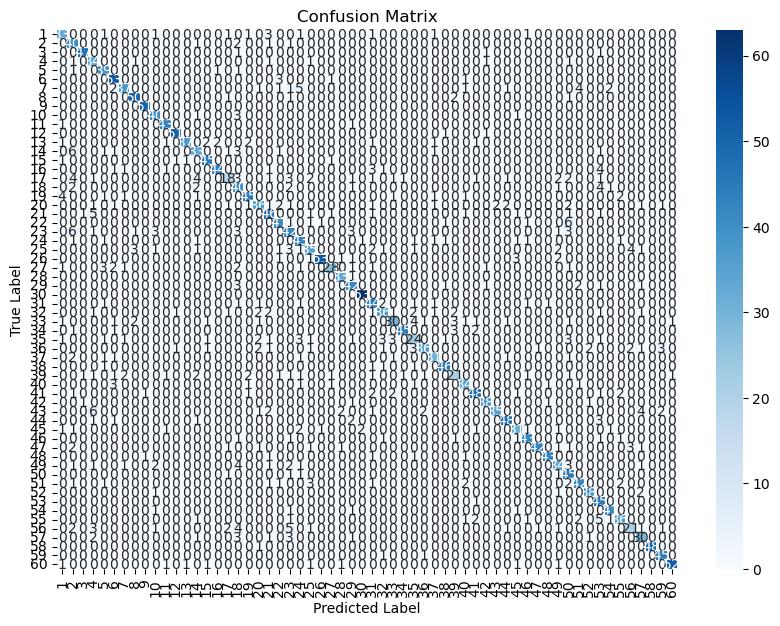

In [36]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(1, 61), yticklabels=np.arange(1, 61))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()